In [1]:
#### KMEANS CLUSTERING EXPLORATORY DATA ANALYSIS USING BANK CUSTOMER DATA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

<Axes: xlabel='age', ylabel='Count'>

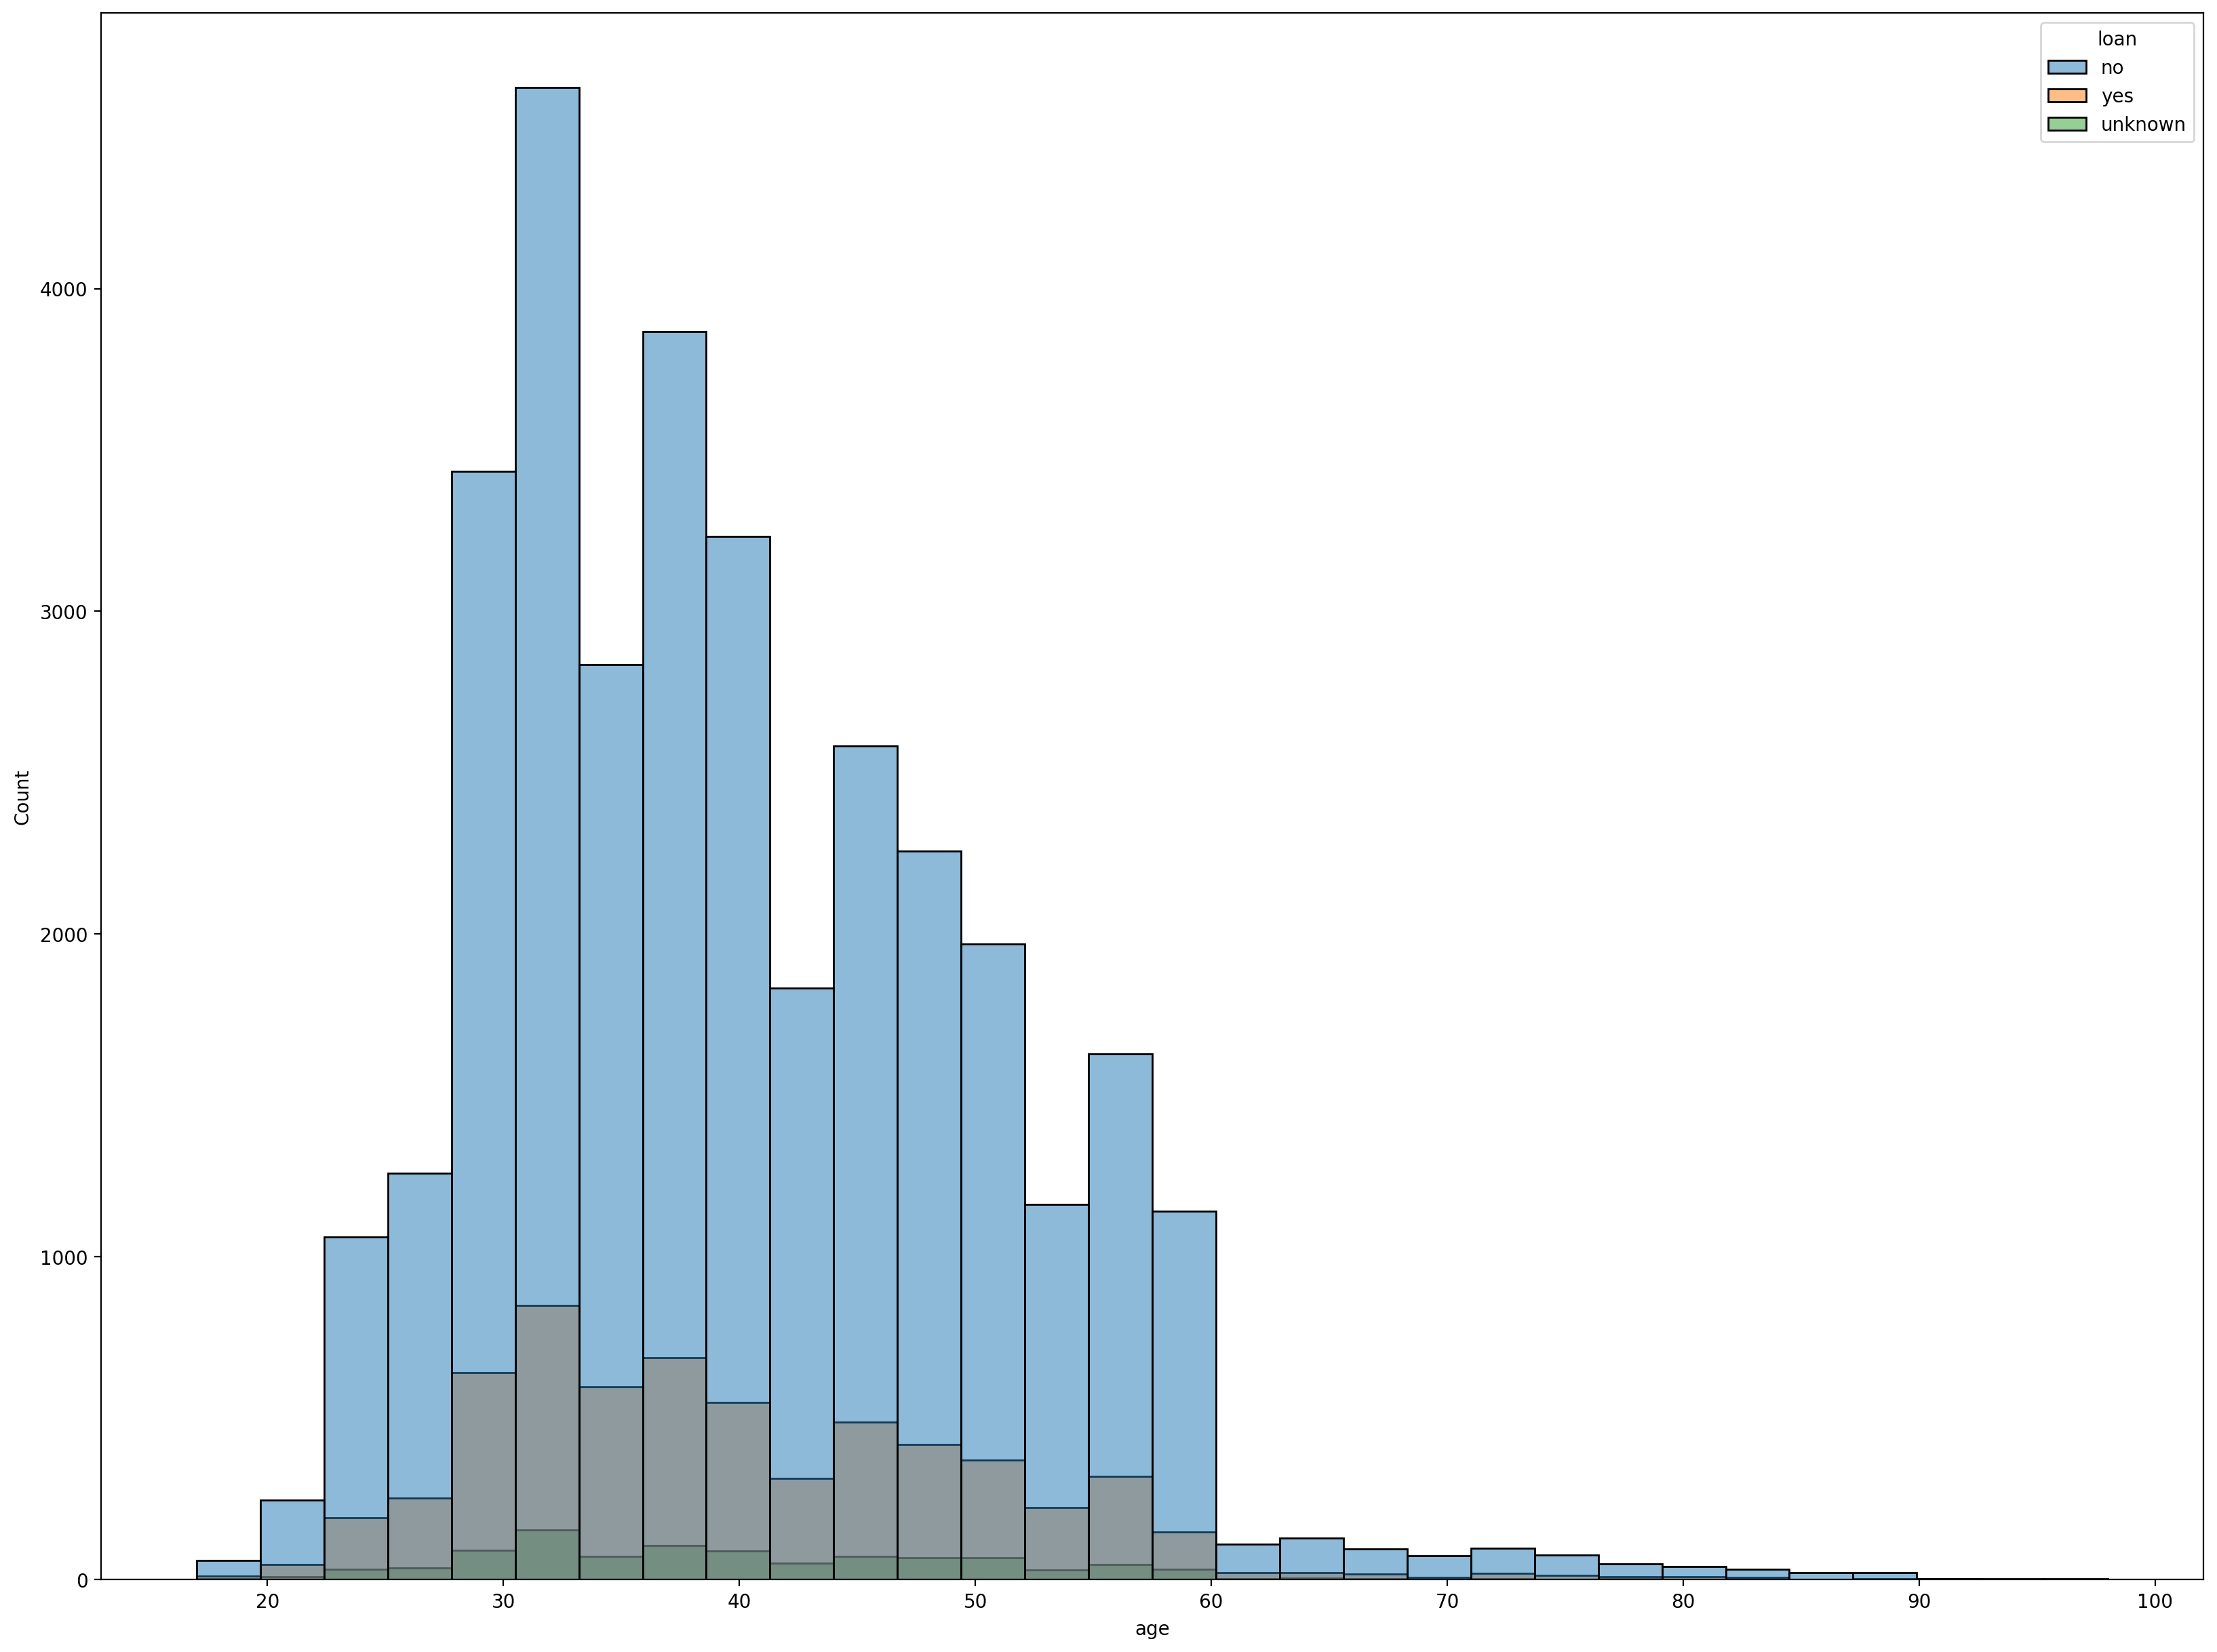

In [8]:
plt.figure(figsize=(20,15),dpi=200)
sns.histplot(data=df,x='age', hue='loan',bins=30)

(0.0, 2000.0)

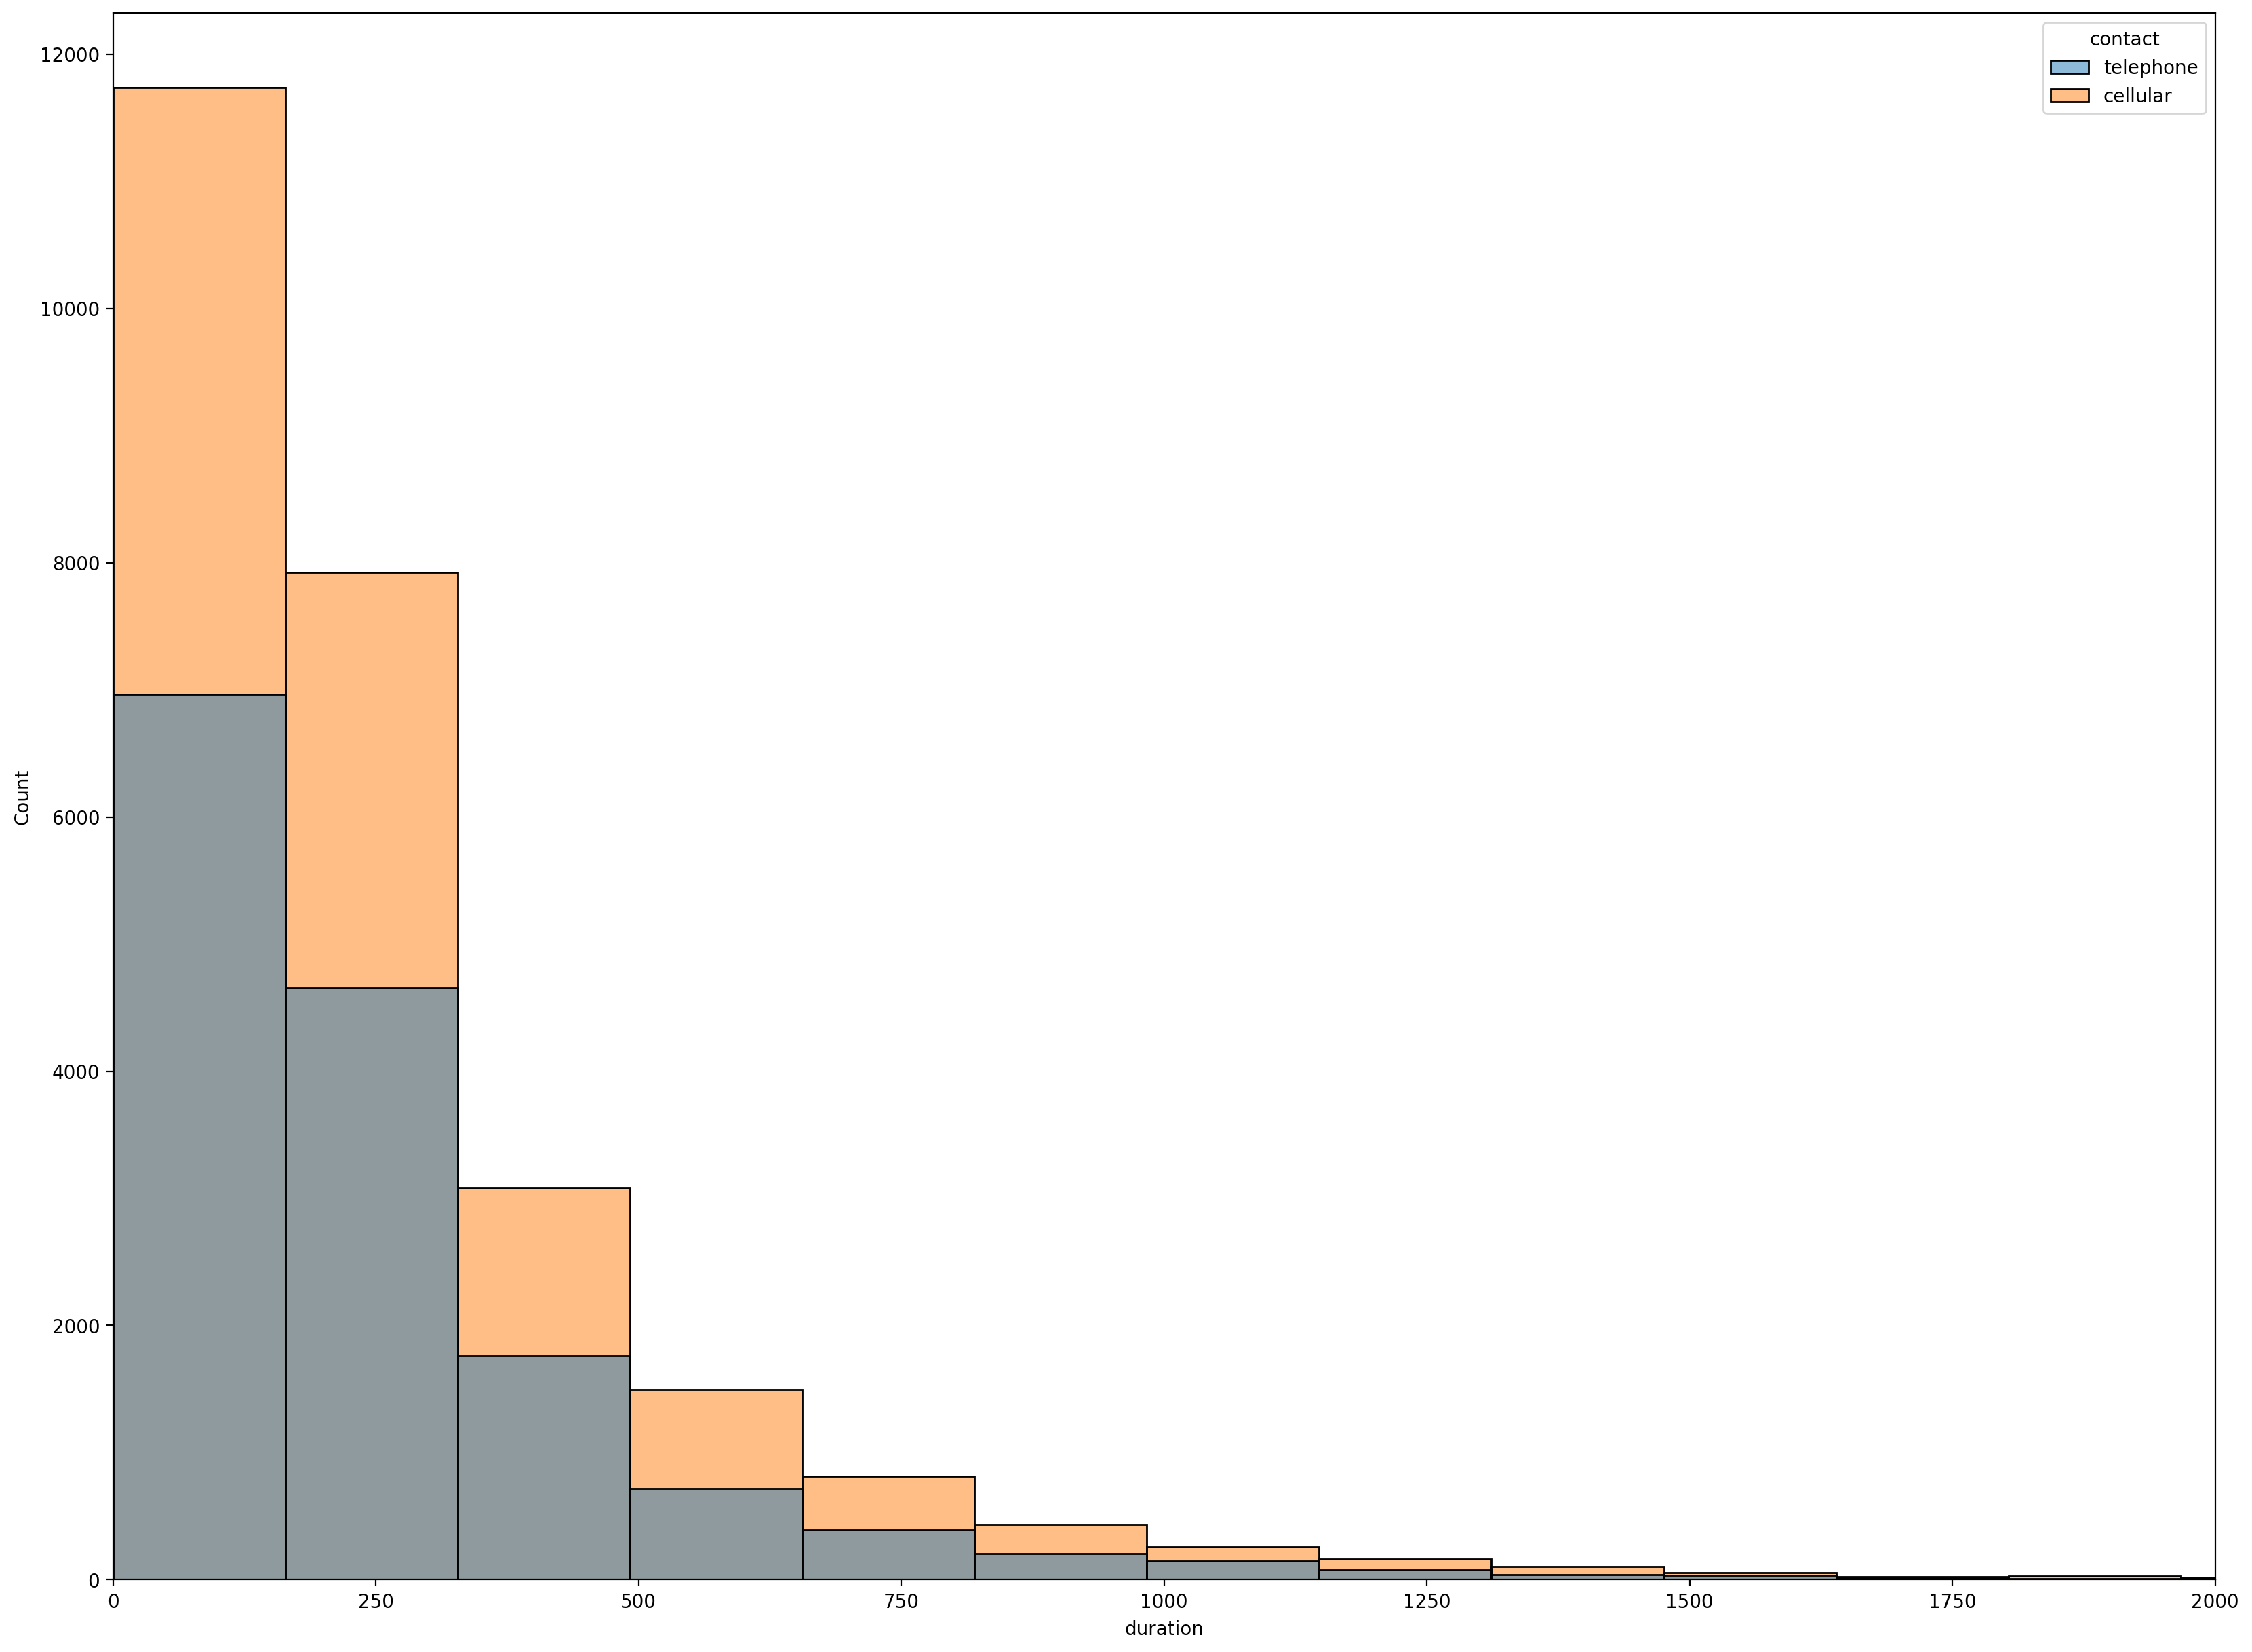

In [9]:
plt.figure(figsize=(20,15),dpi=200)
sns.histplot(data=df,x='duration', hue='contact',bins=30)
plt.xlim(0,2000)

(0.0, 2000.0)

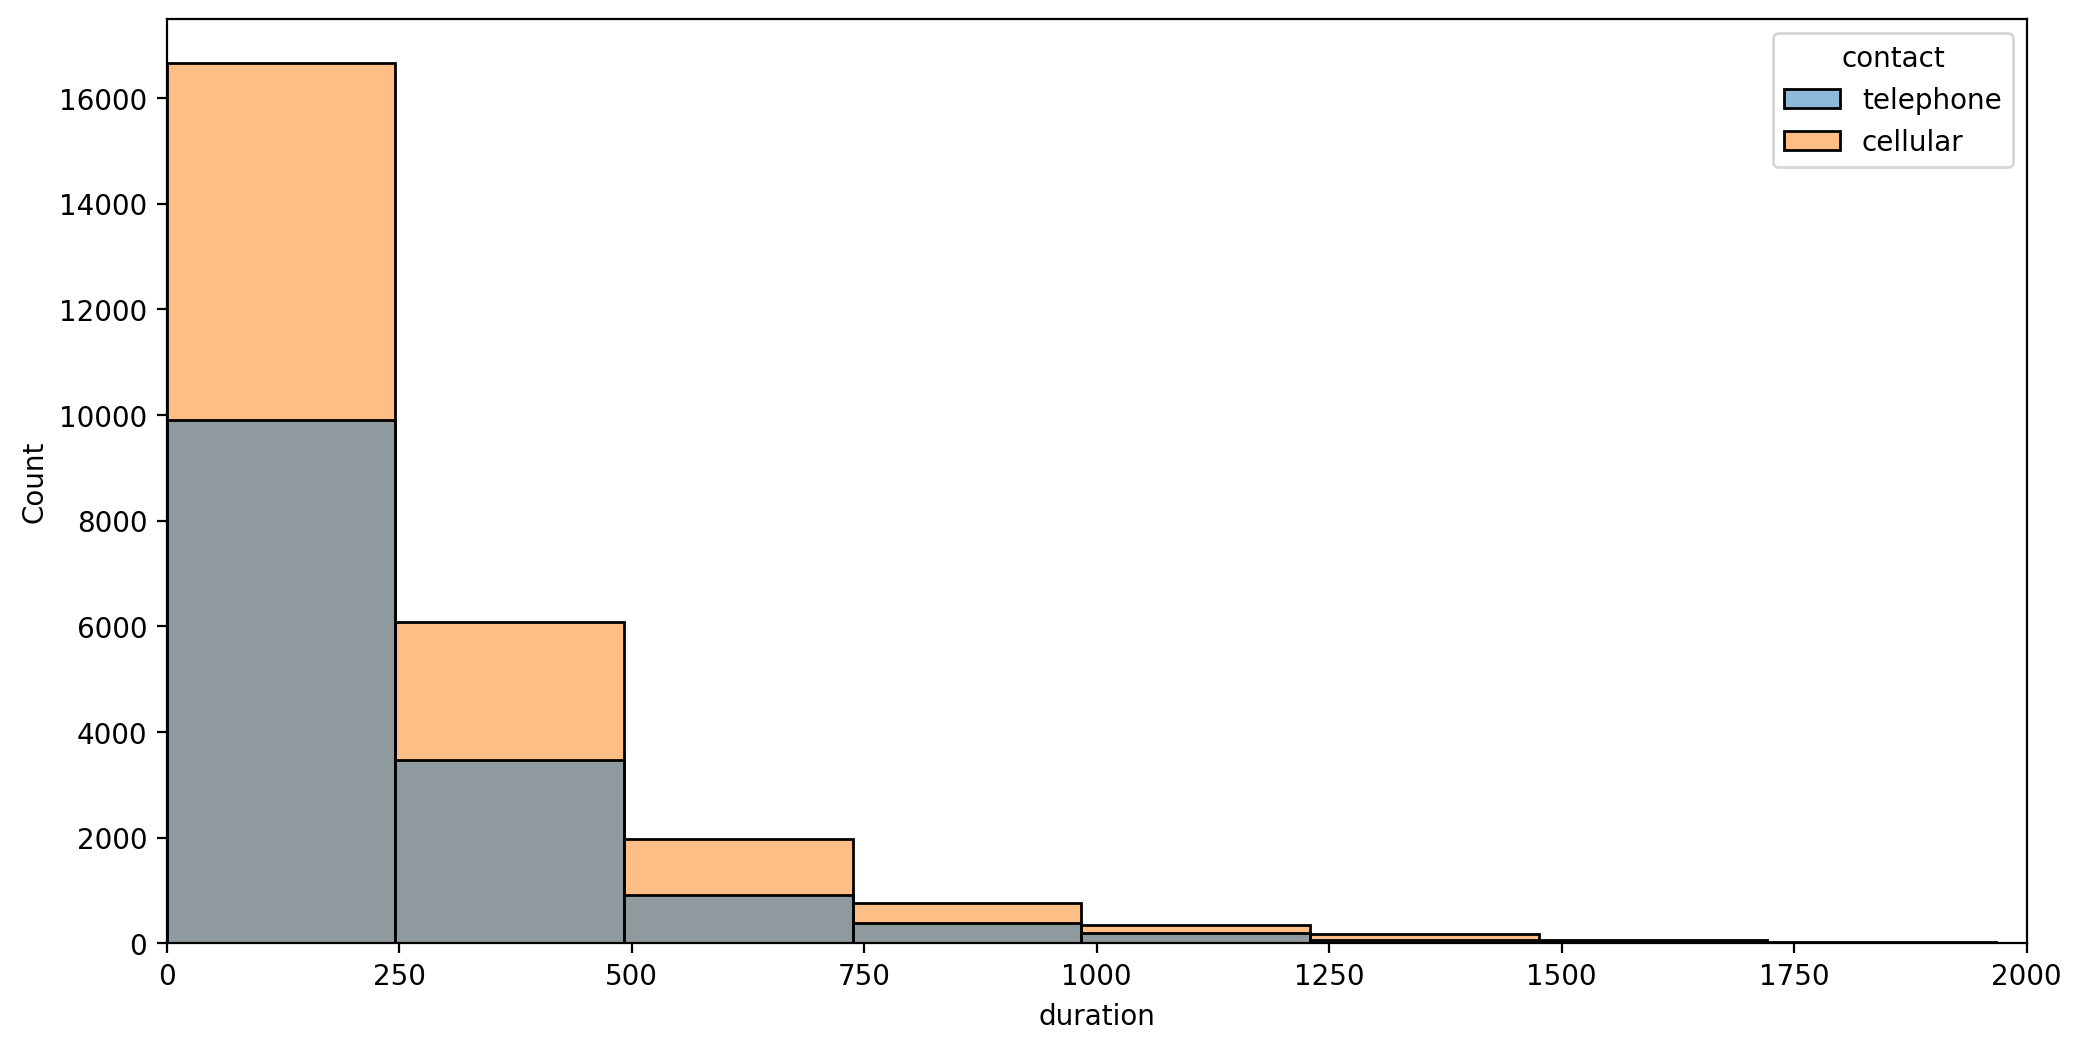

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration', hue='contact',bins=20)
plt.xlim(0,2000)

<Axes: xlabel='duration', ylabel='count'>

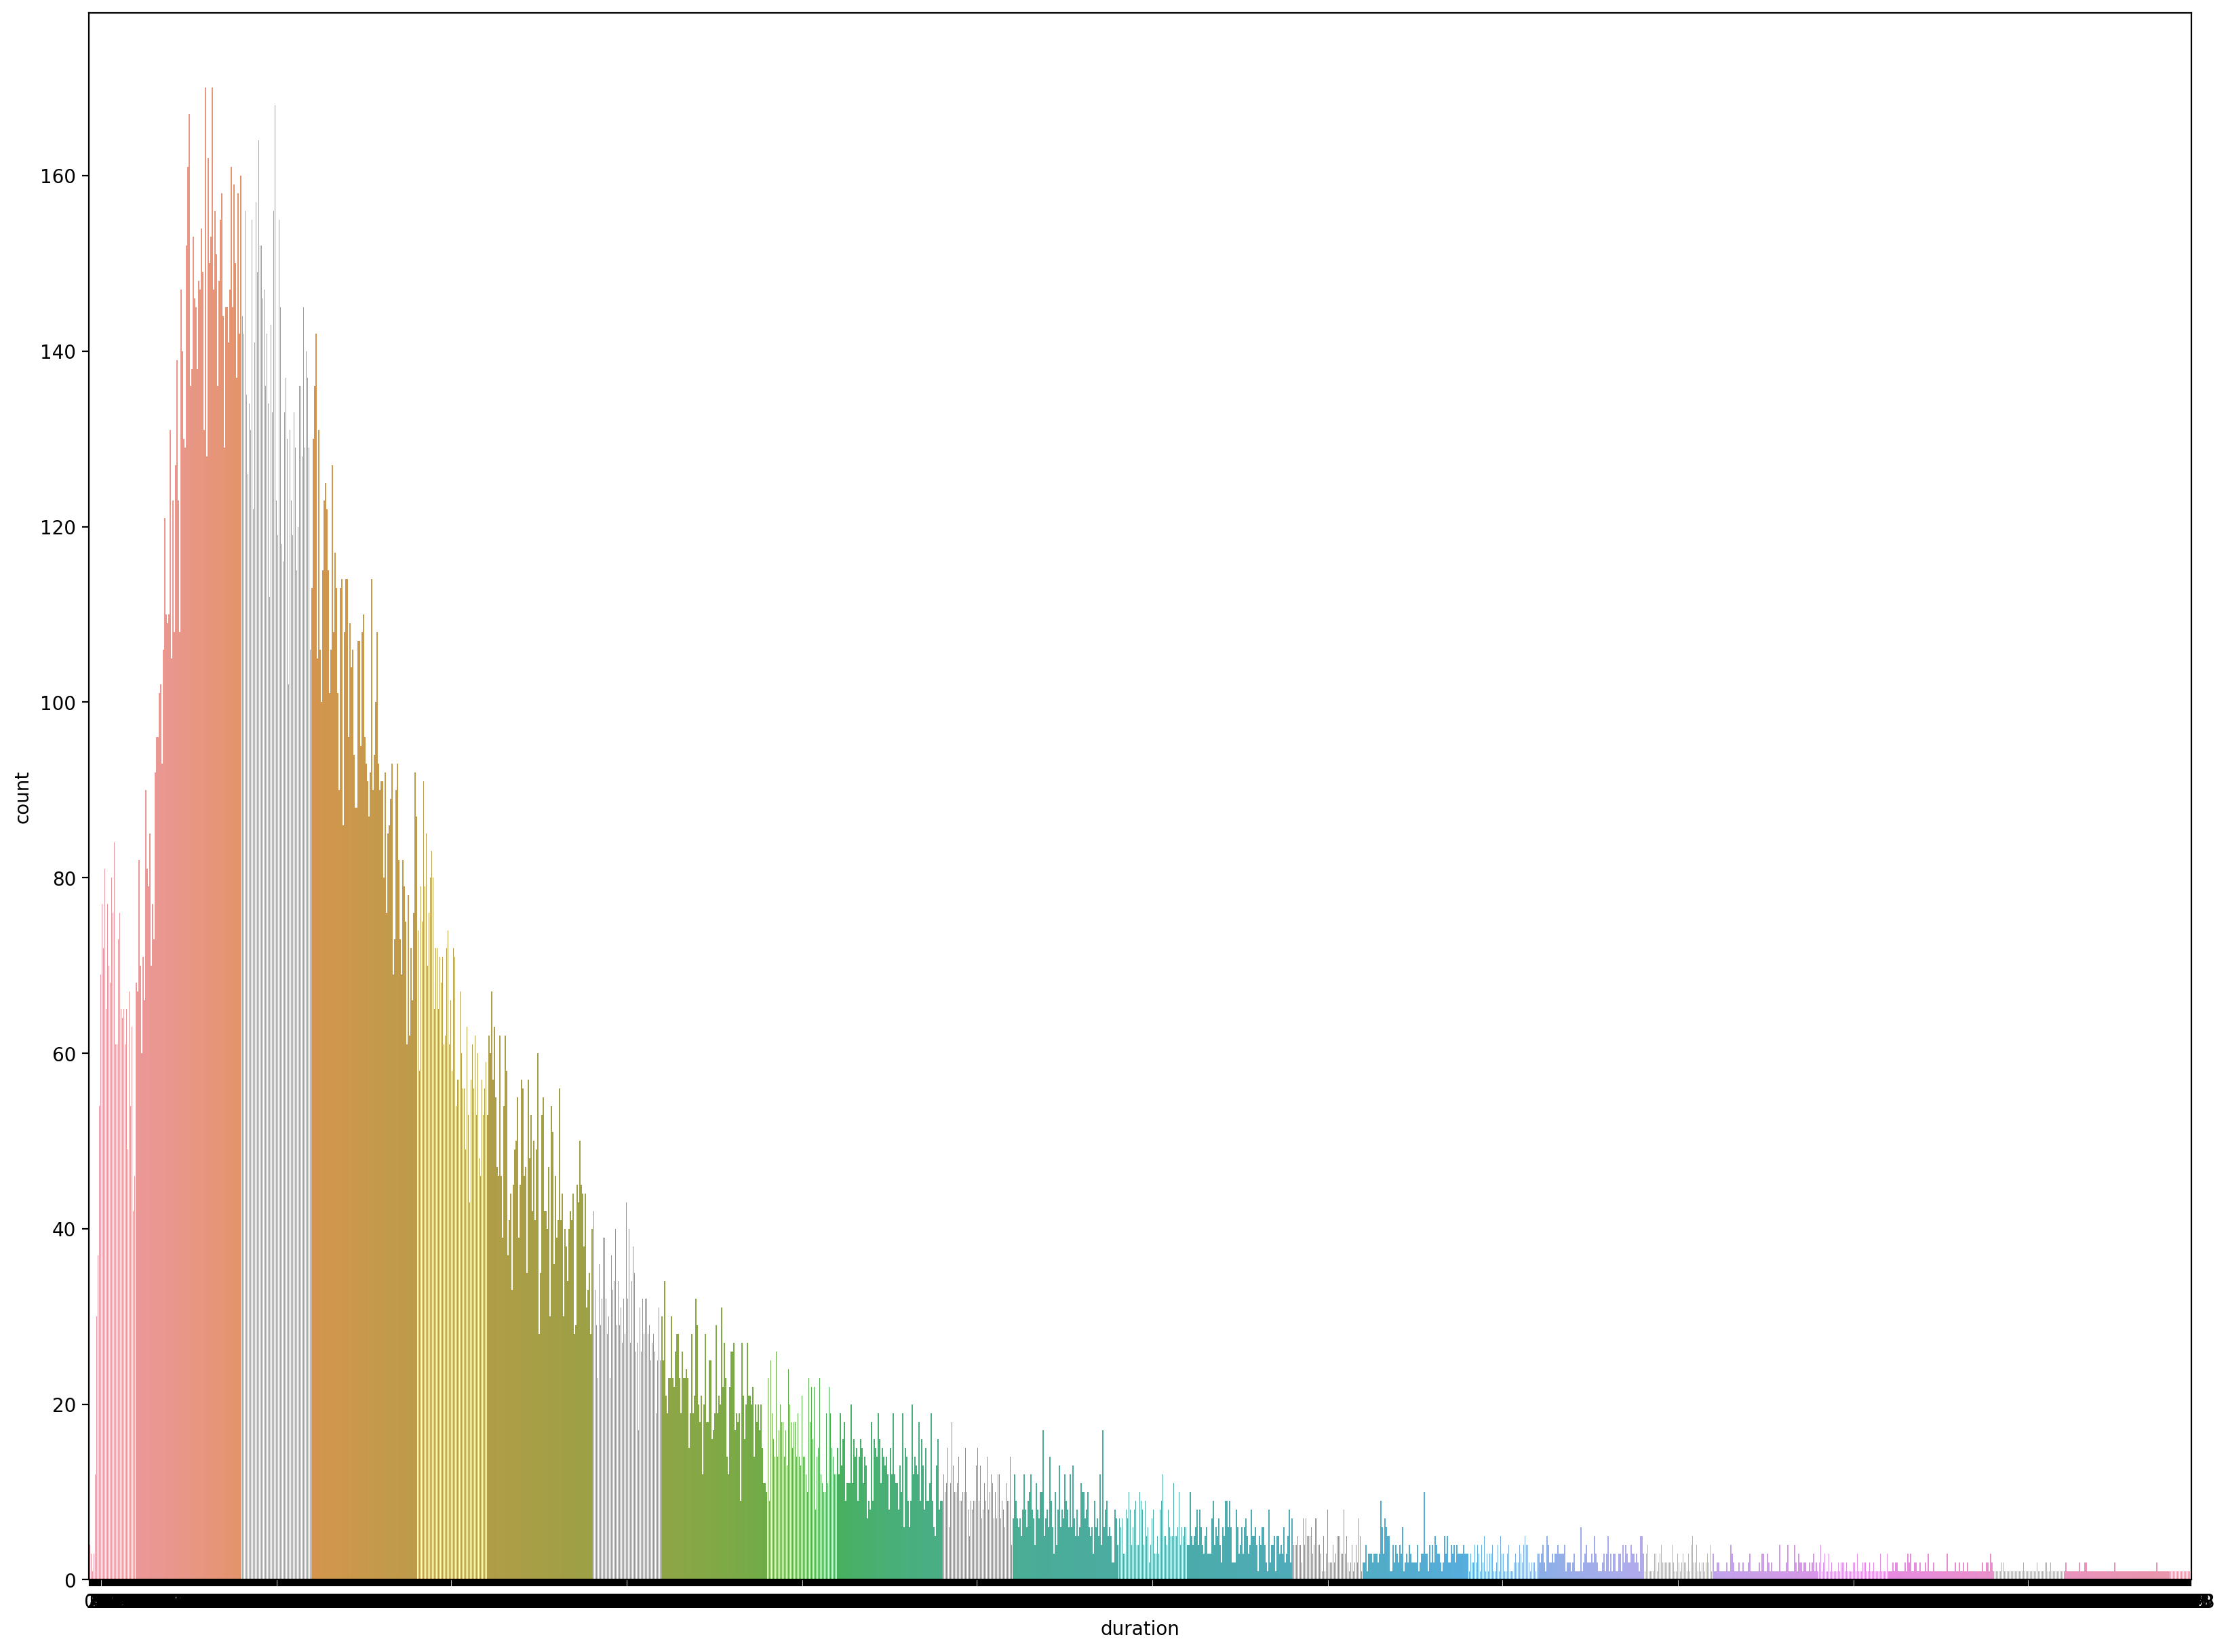

In [11]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data=df,x='duration')


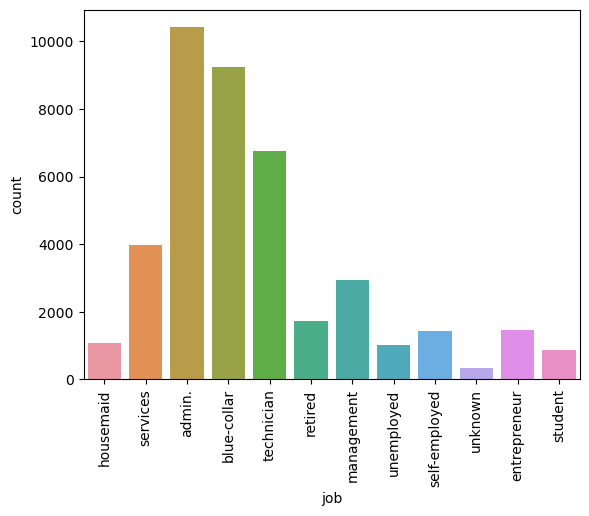

In [12]:
sns.countplot(data=df,x='job')
plt.xticks(rotation=90);

In [13]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

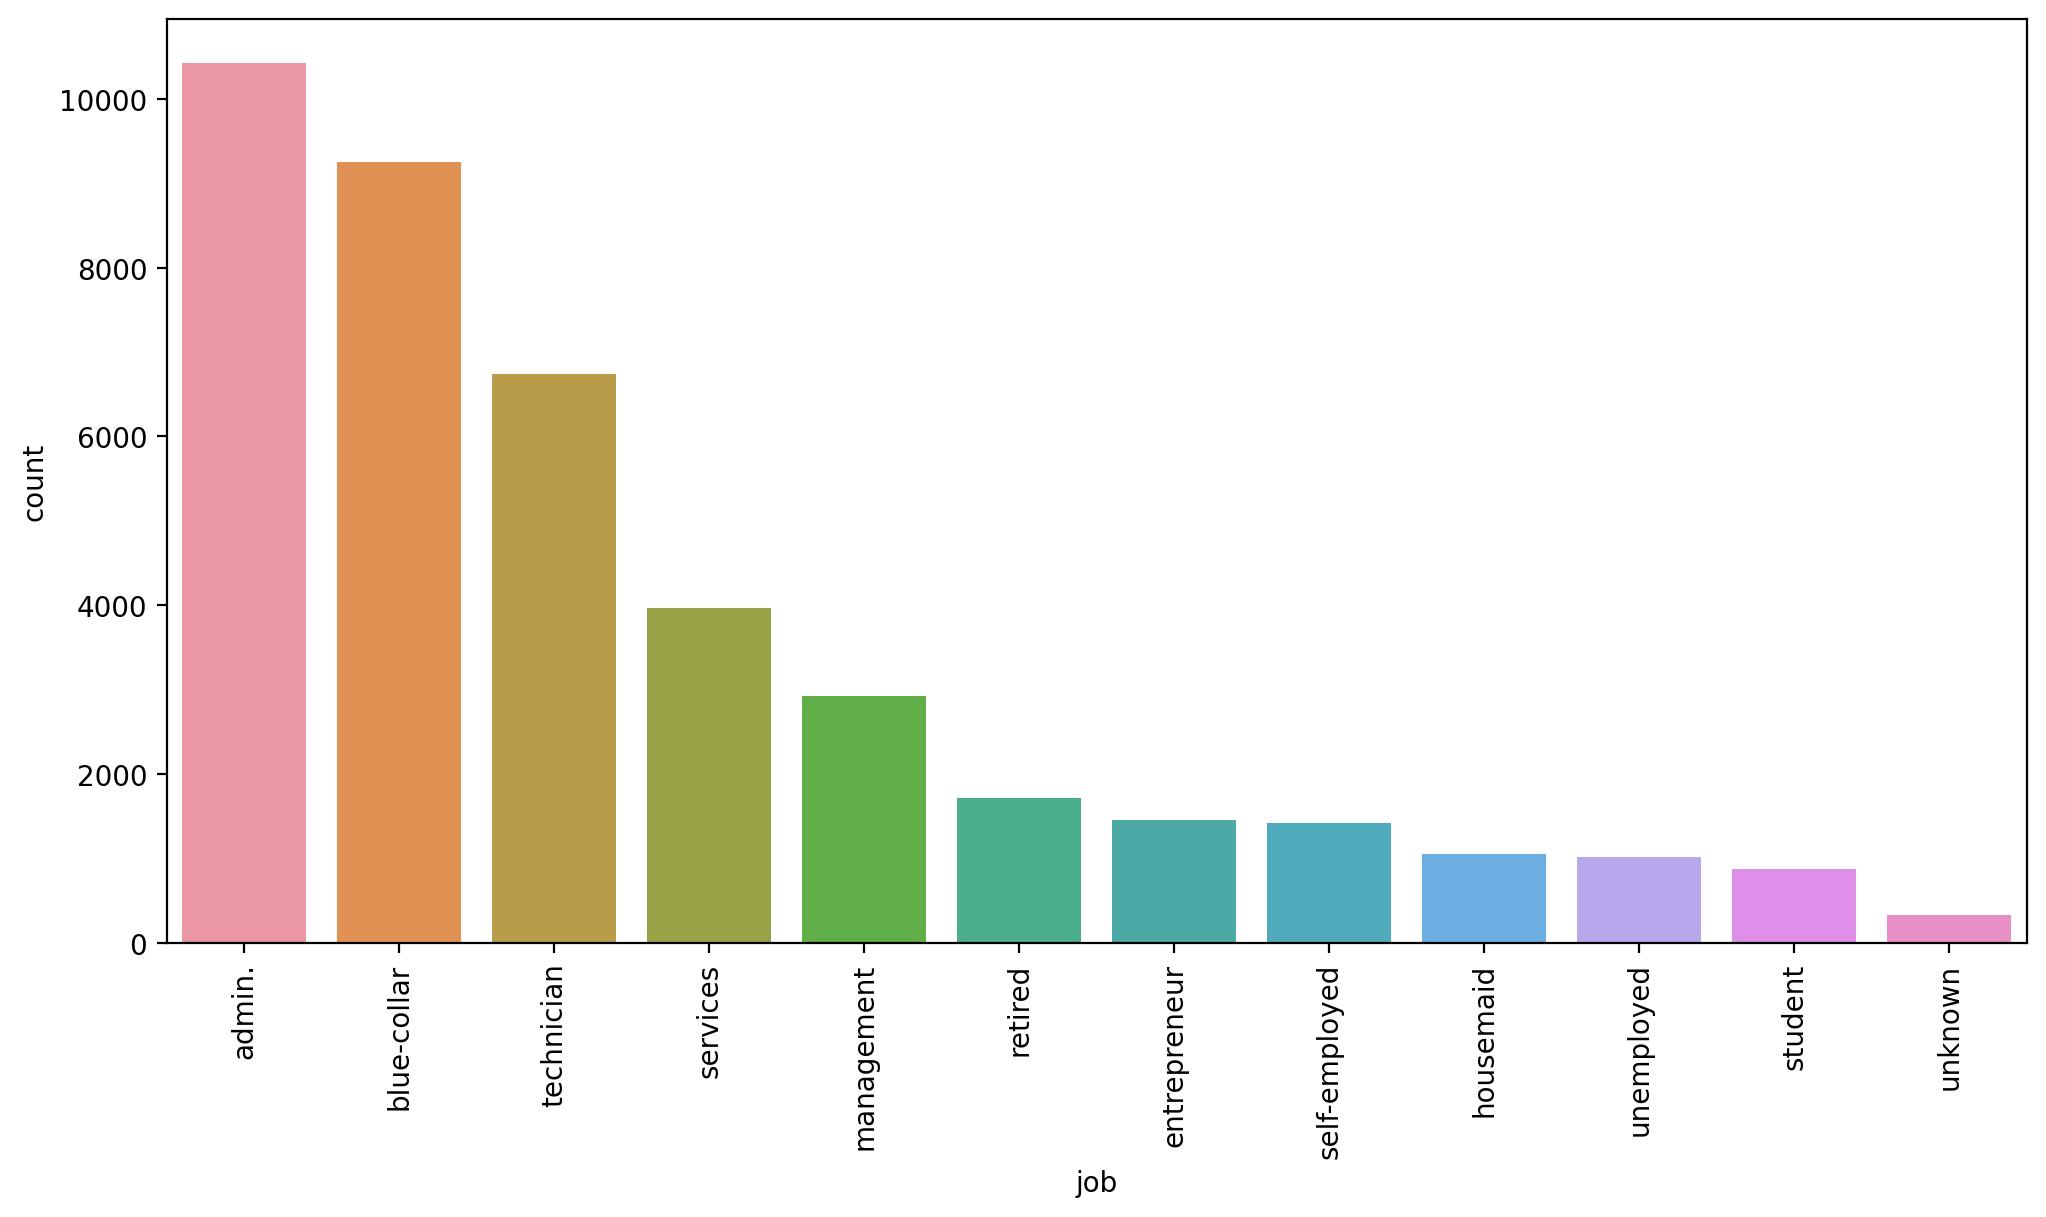

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job', order= df['job'].value_counts().index)
plt.xticks(rotation=90);

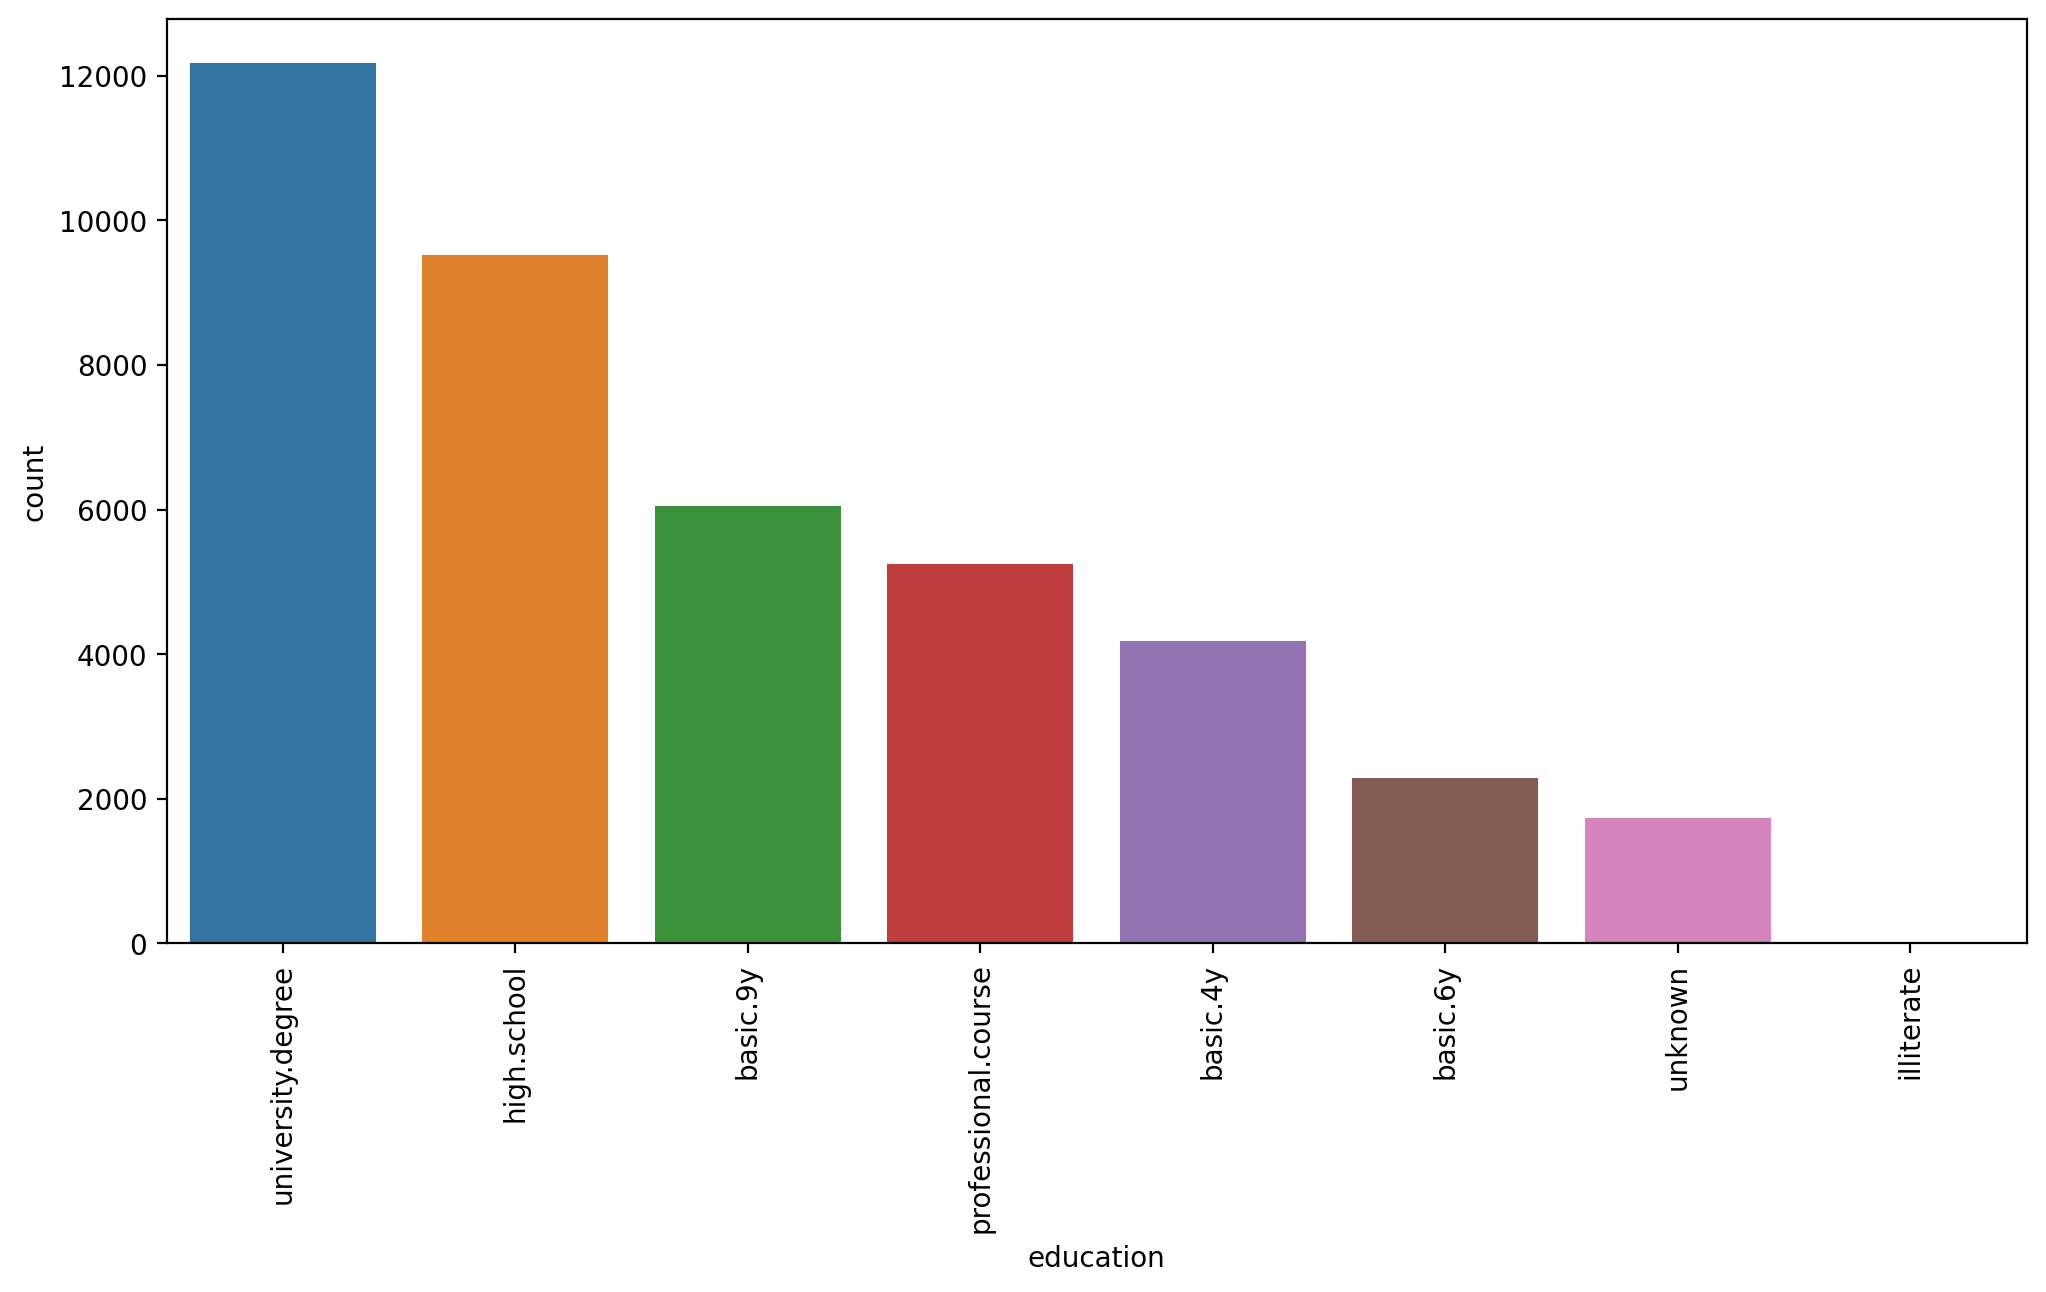

In [15]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education', order= df['education'].value_counts().index)
plt.xticks(rotation=90);

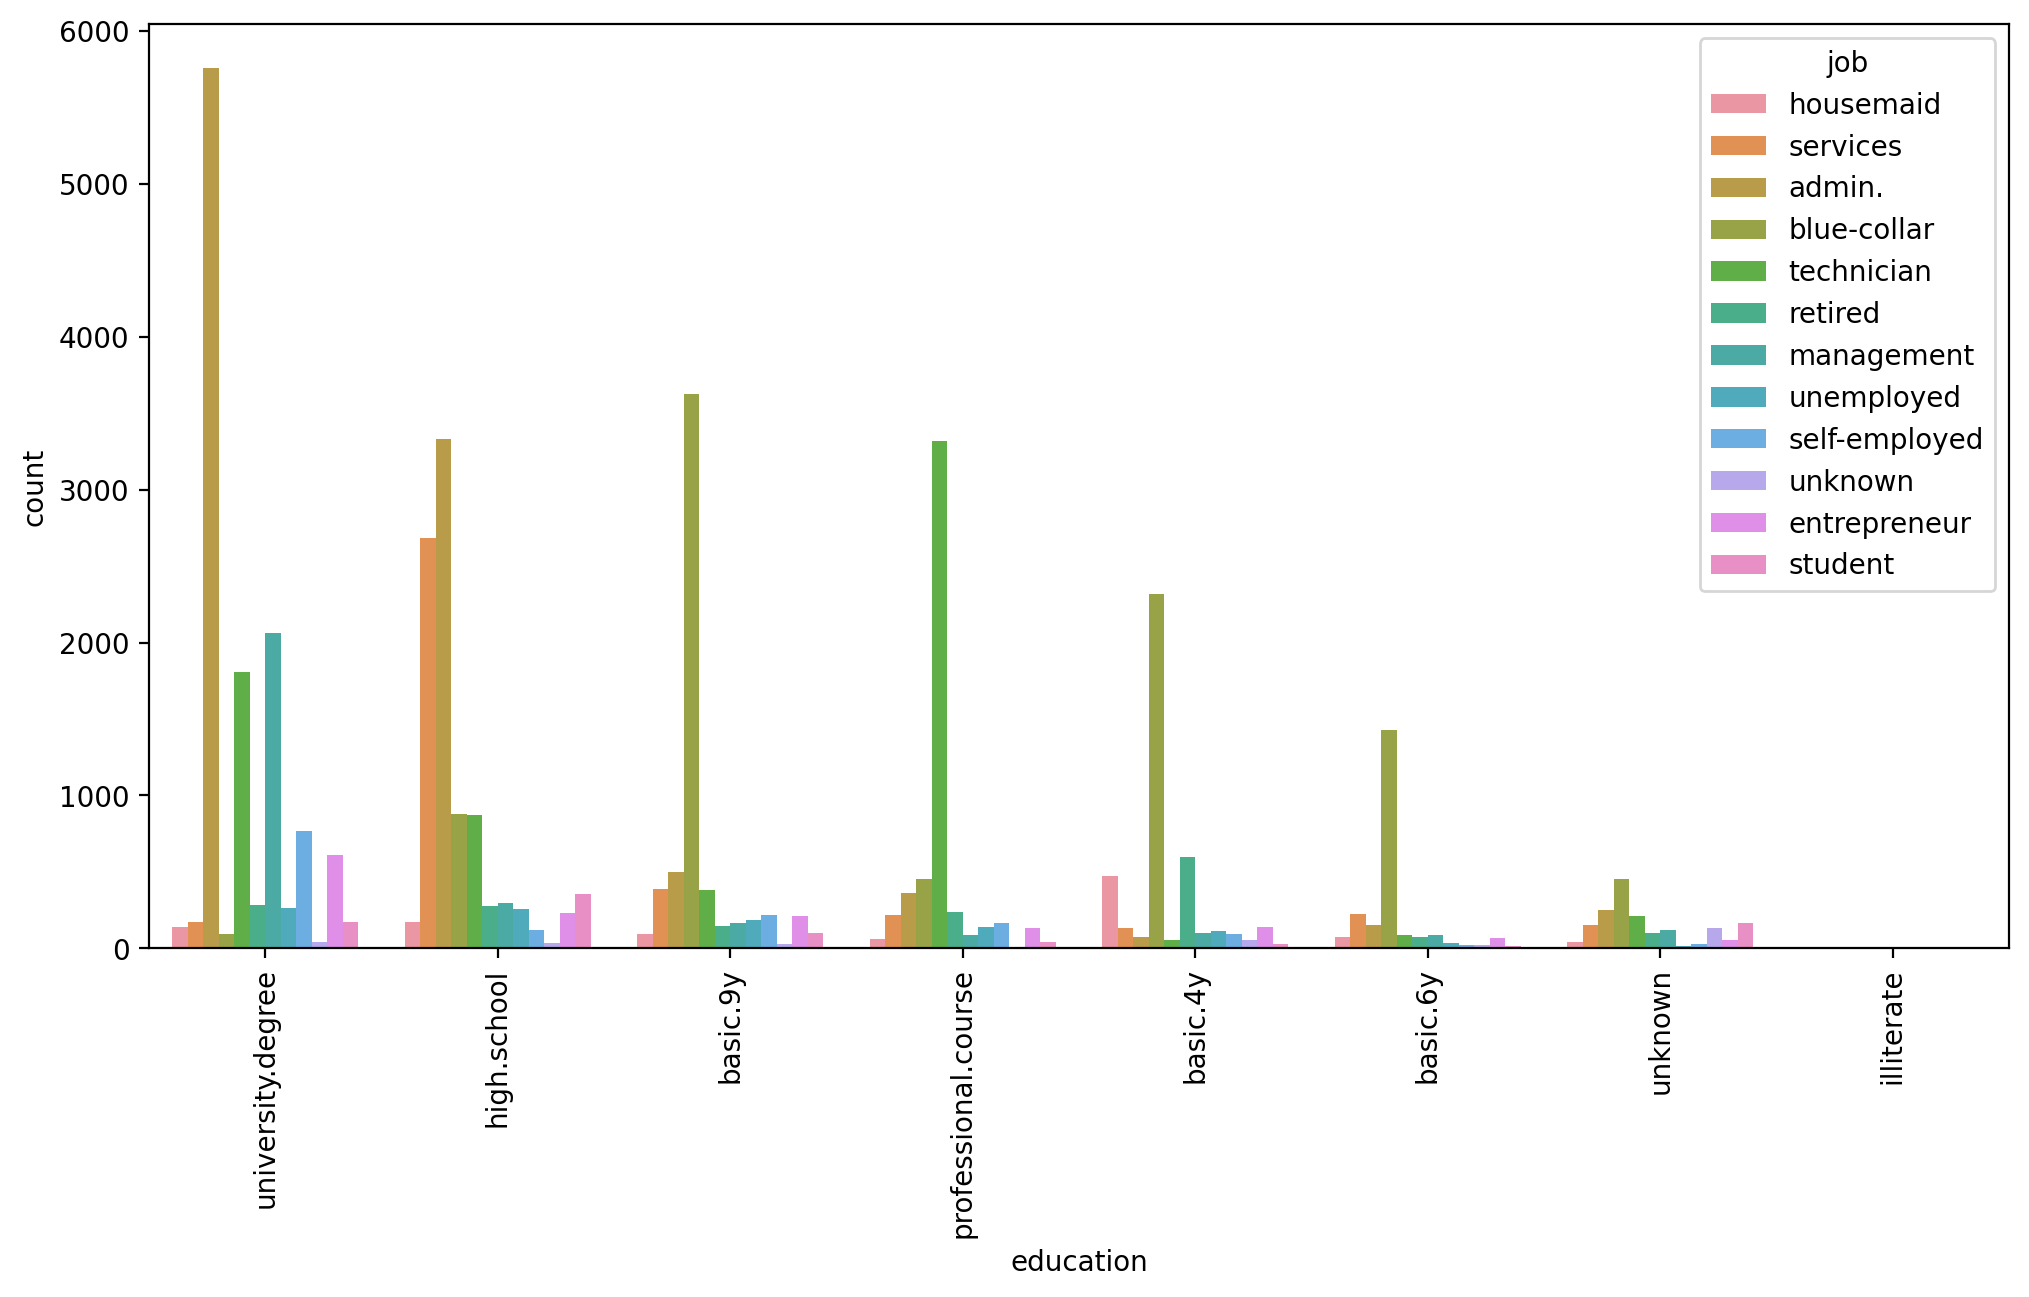

In [16]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education', order= df['education'].value_counts().index, hue ='job')
plt.xticks(rotation=90);

<Axes: xlabel='default', ylabel='count'>

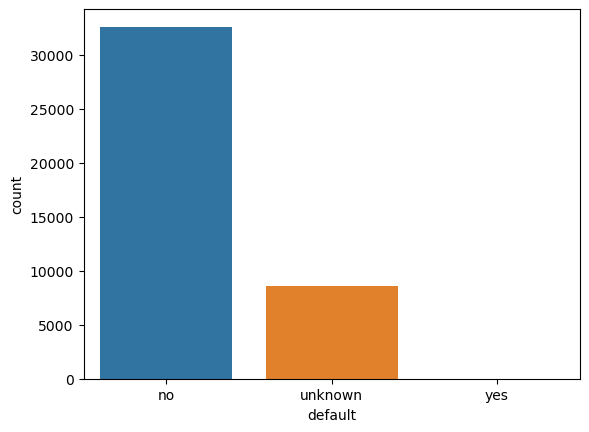

In [17]:
sns.countplot(data=df,x='default')

In [18]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [19]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [20]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
X = pd.get_dummies(df)

In [22]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


## KMeans

In [23]:
from sklearn import preprocessing

In [24]:
scaled_X = preprocessing.scale(X)

In [25]:
from sklearn.cluster import KMeans

In [26]:
### IDENTIFYINNG THE CLUSTER LABEL

In [27]:
model =KMeans(n_clusters=2)

In [28]:
cluster_label = model.fit_predict(scaled_X)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
cluster_label

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
## adding the cluster_label as a column to our dataset X
X['cluster']=cluster_label

In [31]:
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,0.019767
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,-0.039581
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,0.129103
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,0.267714
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,-0.478493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,0.544406
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,-0.254406
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,0.294472
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,-0.294472


In [32]:
### find the correlation of X with respect to cluster column
X.corr()['cluster']

age                     0.019767
duration               -0.039581
campaign                0.129103
pdays                   0.267714
previous               -0.478493
                          ...   
poutcome_nonexistent    0.544406
poutcome_success       -0.254406
subscribed_no           0.294472
subscribed_yes         -0.294472
cluster                 1.000000
Name: cluster, Length: 66, dtype: float64

In [33]:
## excluding the cluster row
X.corr()['cluster'].iloc[:-1]

age                     0.019767
duration               -0.039581
campaign                0.129103
pdays                   0.267714
previous               -0.478493
                          ...   
poutcome_failure       -0.464320
poutcome_nonexistent    0.544406
poutcome_success       -0.254406
subscribed_no           0.294472
subscribed_yes         -0.294472
Name: cluster, Length: 65, dtype: float64

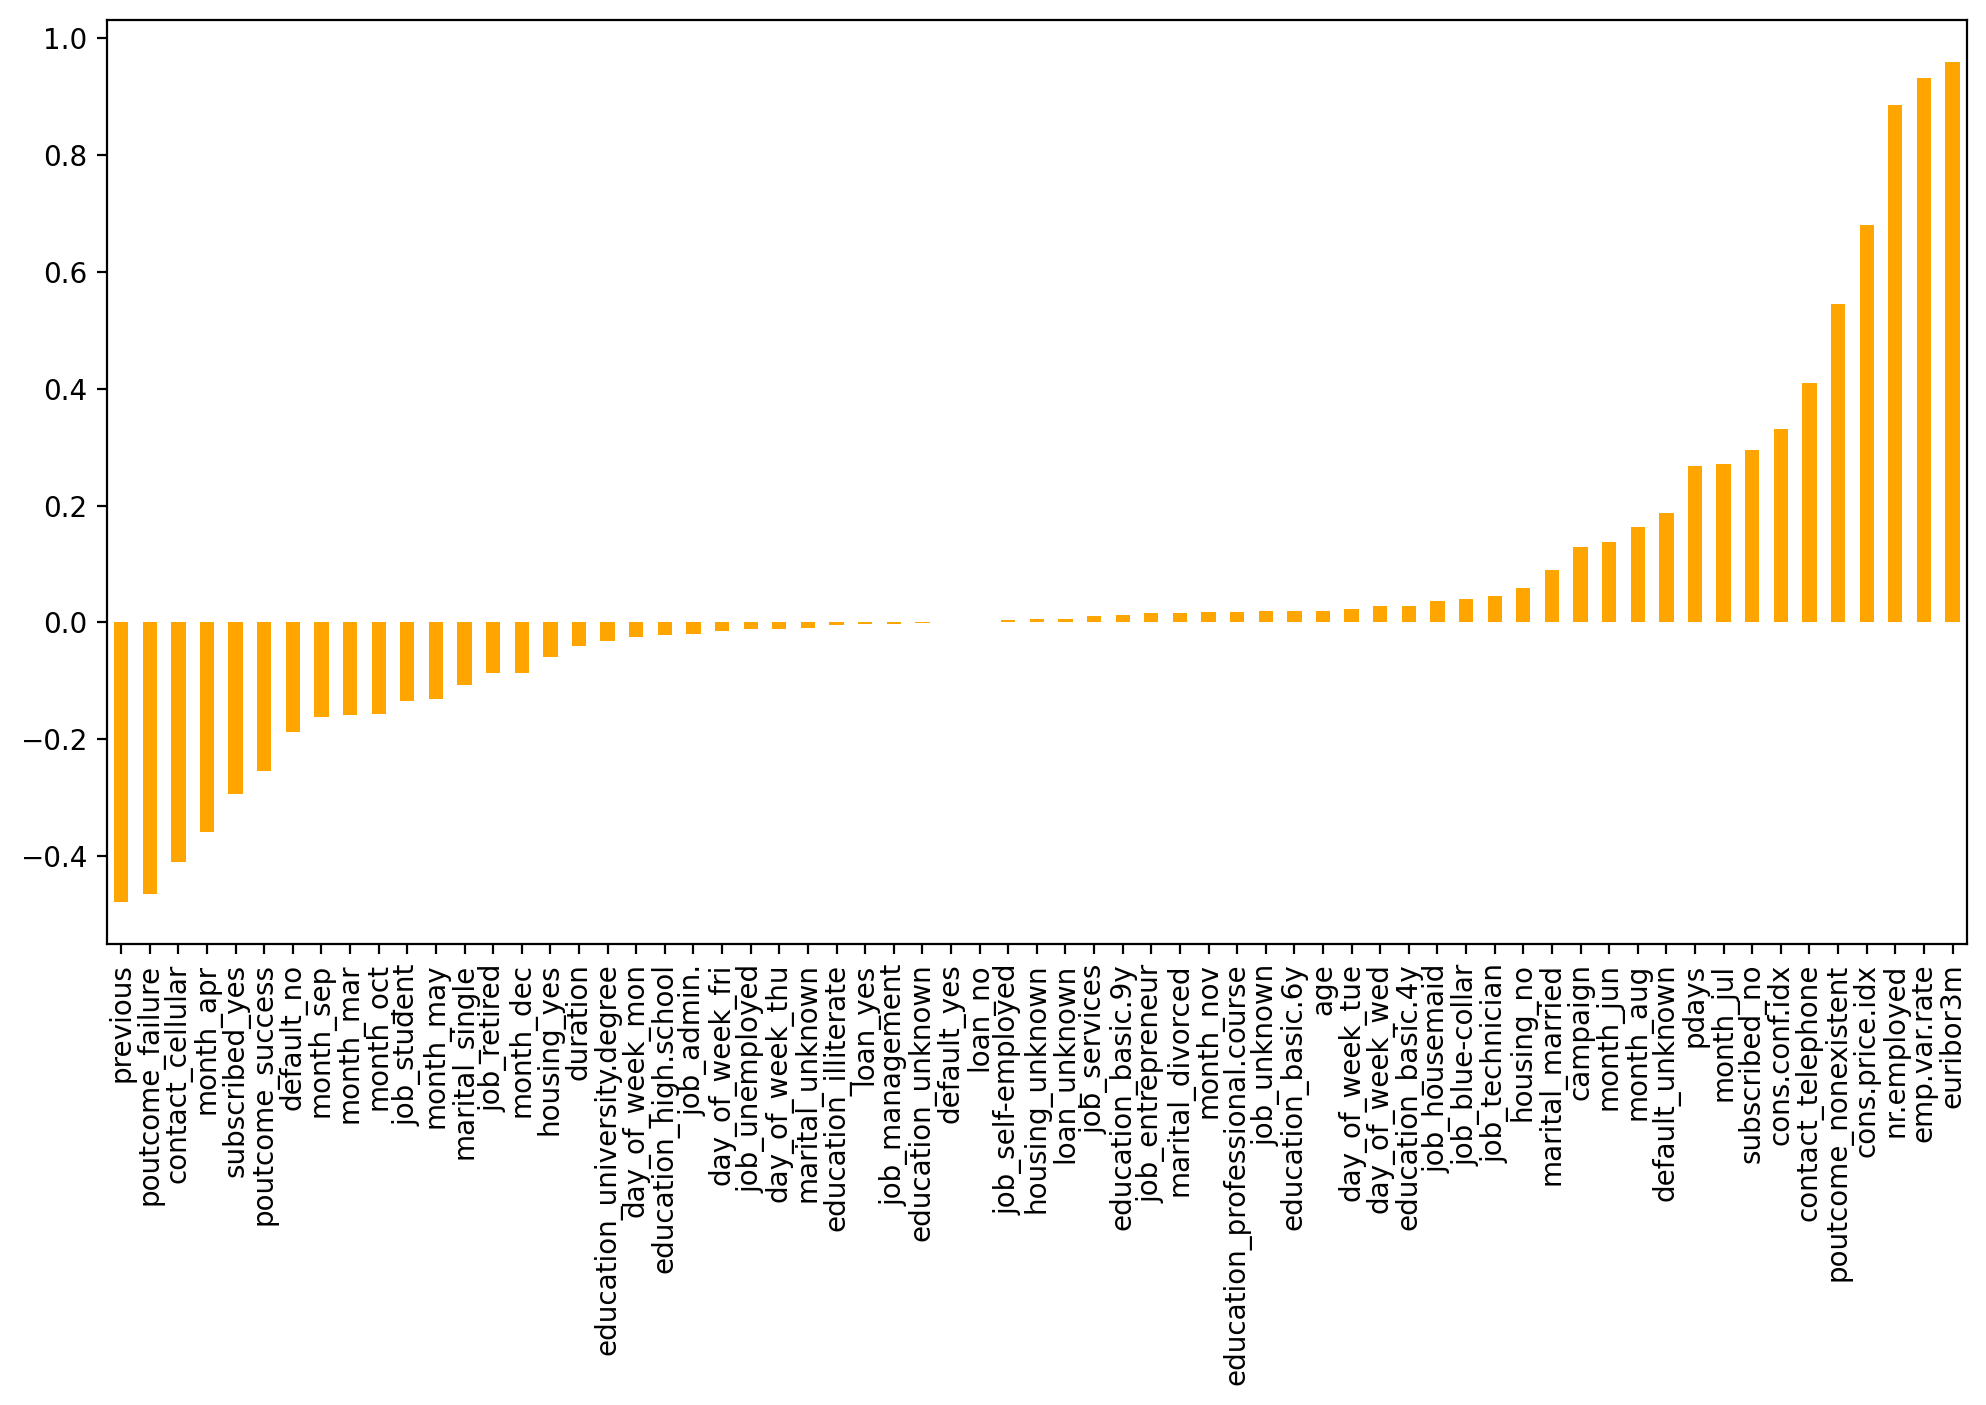

In [34]:

## visualize the correlation between cluster and other features

plt.figure(figsize=(12,6),dpi=200)
X.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar',color='orange')
plt.xticks(rotation=90);

### SUM OF SQUARE DISTANCE

In [35]:
ssd = []
for k in range (2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [36]:
ssd

[2469792.3616627455,
 2370787.0047043124,
 2271503.020972042,
 2203314.6034995667,
 2151167.1682897457,
 2085182.9837597408,
 2039559.534439023,
 2006761.9892110233]

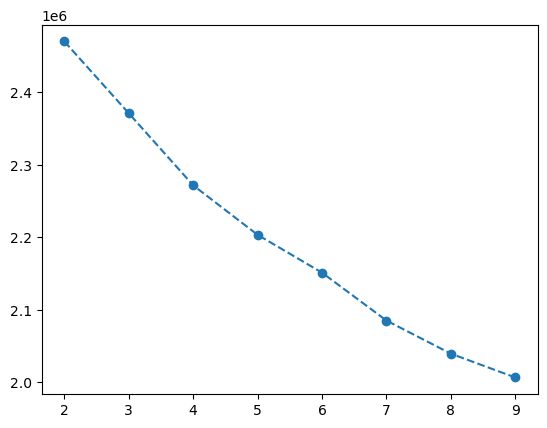

In [37]:
plt.plot(range(2,10),ssd,'o--')

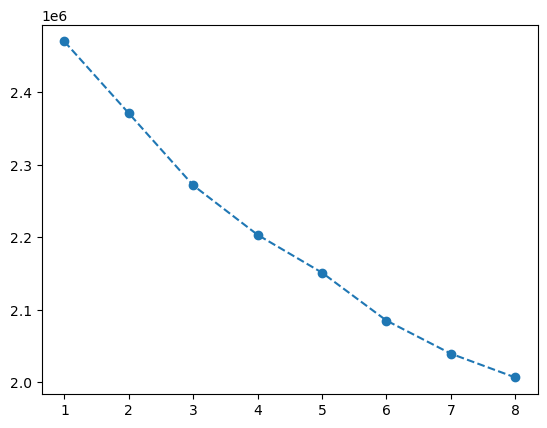

In [38]:
plt.plot(range(1,9),ssd,'o--')

### K-MEANS COLOR QUANTIZATION

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [40]:
mpimg.imread('palm_trees.jpg')

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [41]:
image =mpimg.imread('palm_trees.jpg')

In [42]:
image.shape

(1401, 934, 3)

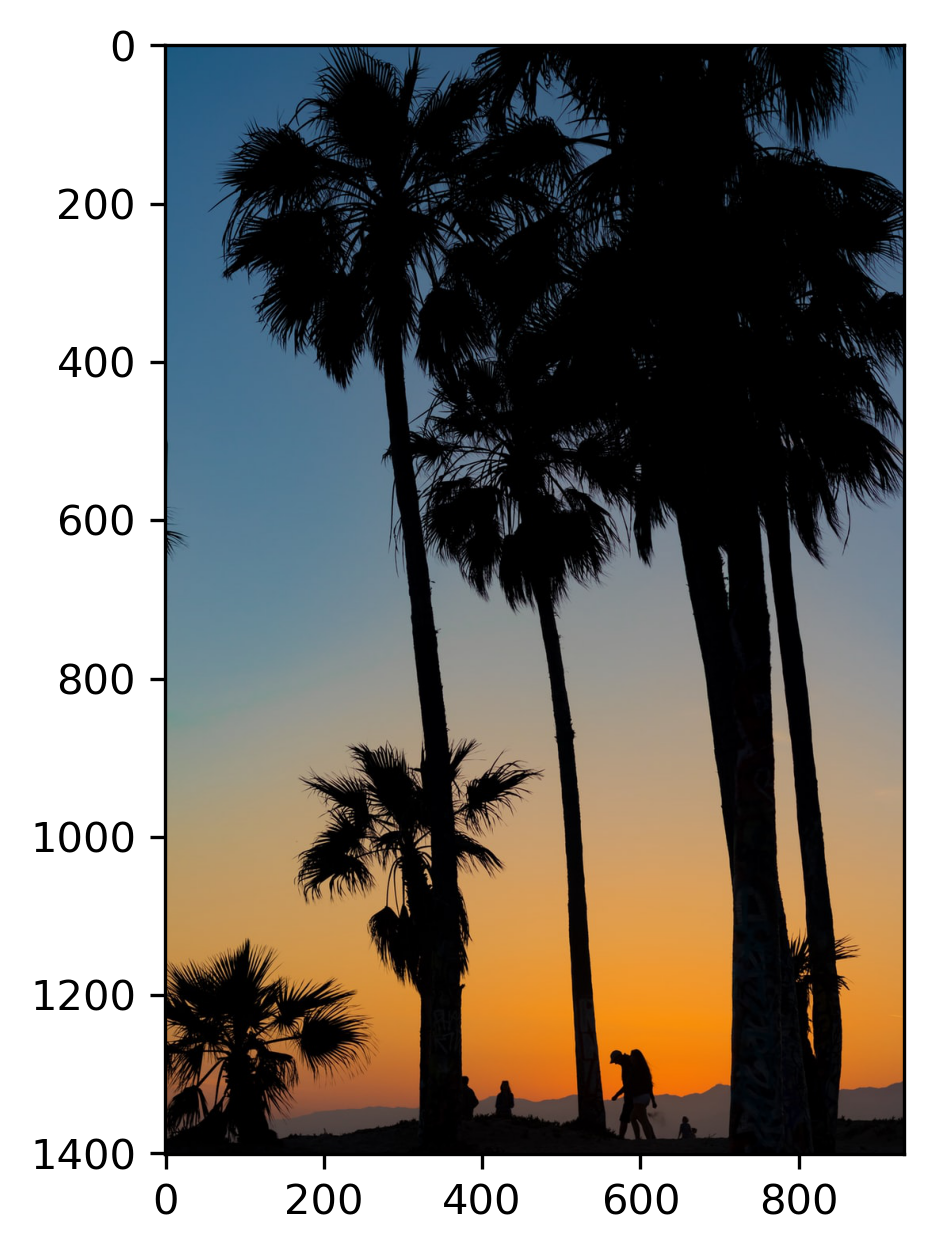

In [43]:
plt.figure(dpi=300)
plt.imshow(image)

In [44]:
### USING KMeans TO QUANTIZE COLOR 

In [45]:
#RESHAPING FROM 3D(H,W,C)= 2D

In [46]:
(H,W,C)= image.shape

In [47]:
H

1401

In [48]:
W

934

In [49]:
C

3

In [50]:
image_2D = image.reshape(H*W,C)

In [51]:
image_2D

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [52]:
from sklearn.cluster import KMeans

In [53]:
model = KMeans(n_clusters=6)
label=model.fit_predict(image_2D)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
rgb_codes = model.cluster_centers_

In [55]:
rgb_codes

array([[  2.75659154,   2.57529968,   3.70012508],
       [191.45660313, 154.52547084, 109.63137723],
       [ 71.12526864, 109.27679682, 137.69417556],
       [219.02710886, 135.42650506,  47.00342746],
       [136.73533325, 143.74401484, 143.9844705 ],
       [ 67.25337203,  61.54496264,  62.01242432]])

In [56]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [57]:
rgb_codes

array([[  3,   3,   4],
       [191, 155, 110],
       [ 71, 109, 138],
       [219, 135,  47],
       [137, 144, 144],
       [ 67,  62,  62]])

In [58]:
label

array([2, 2, 2, ..., 0, 0, 0])

In [59]:
rgb_codes[label]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [60]:
##QUANTIZING THE COLOR to 6 colors
# Reshaping our 2D to 3D

In [61]:
Quantized_image = np.reshape(rgb_codes[label],(H,W,C))

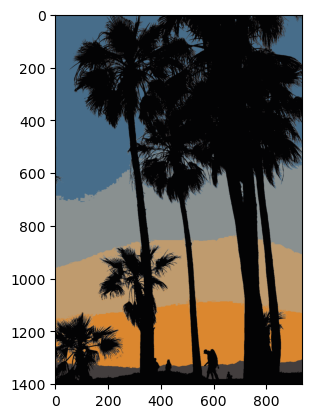

In [62]:
plt.imshow(Quantized_image)

In [63]:
##QUANTIZING THE COLOR to 12 colors
# Reshaping our 2D to 3D

In [64]:
model = KMeans(n_clusters=5)
label=model.fit_predict(image_2D)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [65]:
rgb_codes = model.cluster_centers_

In [66]:
rgb_codes[label]

array([[ 77.75516968, 113.75358936, 139.79473545],
       [ 77.75516968, 113.75358936, 139.79473545],
       [ 77.75516968, 113.75358936, 139.79473545],
       ...,
       [  2.77706285,   2.59262397,   3.71553791],
       [  2.77706285,   2.59262397,   3.71553791],
       [  2.77706285,   2.59262397,   3.71553791]])

In [67]:
Quntized_image = np.reshape(rgb_codes[label],(H,W,C))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


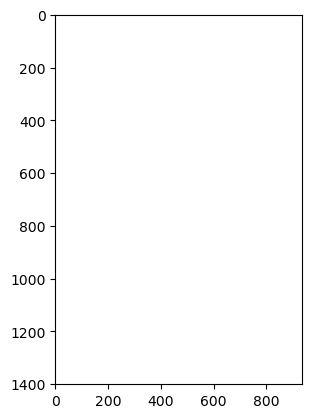

In [68]:
plt.imshow(Quntized_image)